**CAUSE OF DEATH DATA ANALYSIS**

**PROBLEM STATEMENT**

In this Dataset, we have Historical Data of different cause of deaths for all ages around the World. The objective is to apply the analytical skills **to give findings and conclusions in detailed data analysis**.


In [ ]:
import pandas as pd
import numpy as np
import warnings # Filtering warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py 


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cause_of_deaths dataset.csv to cause_of_deaths dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cause_of_deaths dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


A straightforward way to assess the health status of a population is to focus on **mortality** – or concepts like *child mortality or life expectancy*, which are based on mortality estimates. A focus on mortality, however, does not take into account that the **burden of diseases** is not only that they kill people, but that they cause suffering to people who live with them. **Assessing health** outcomes by both **mortality and morbidity** (the prevalent diseases) provides a more encompassing view on health outcomes. **This is the topic of this entry.**

The **sum of mortality and morbidity** is referred to as the **‘burden of disease’** and can be measured by a *metric* called **‘Disability Adjusted Life Years‘ (DALYs).** DALYs are **measuring lost health** and are a standardized metric that allow for direct comparisons of disease burdens of different diseases across countries, between different populations, and over time. Conceptually, **one DALY is the equivalent of losing one year in good health** because of either premature death or disease or disability. One DALY represents one lost year of healthy life. The first ‘Global Burden of Disease’ (GBD) was GBD 1990 and the DALY metric was prominently featured in the World Bank’s 1993 World Development Report. Today it is published by both the researchers at the Institute of Health Metrics and Evaluation (IHME) and the ‘Disease Burden Unit’ at the World Health Organization (WHO), which was created in 1998. The IHME continues the work that was started in the early 1990s and publishes the Global Burden of Disease study.

In [ ]:
print("\033[1m" + 'Number of rows in the given dataset:' + "\033[0m")
print(df.shape[0])

print("\033[1m" + 'Number of columns in the given dataset:'  + "\033[0m")
df.shape[1]

Number of rows in the given dataset:
6120
Number of columns in the given dataset:


34

In [ ]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In this Dataset, we have Historical Data of different cause of deaths for all ages around the World. 

**The key features of this Dataset are:**

  * 01. Country/Territory - Name of the Country/Territory
  * 02. Code - Country/Territory Code
  * 03. Year - Year of the Incident
  * 04. Meningitis - No. of People died from Meningitis
  * 05. Alzheimer's Disease and Other Dementias - No. of People died from Alzheimer's Disease and Other Dementias
  * 06. Parkinson's Disease - No. of People died from Parkinson's Disease
  * 07. Nutritional Deficiencies - No. of People died from Nutritional Deficiencies
  * 08. Malaria - No. of People died from Malaria
  * 09. Drowning - No. of People died from Drowning
  * 10. Interpersonal Violence - No. of People died from Interpersonal Violence
  * 11. Maternal Disorders - No. of People died from Maternal Disorders
  * 12. Drug Use Disorders - No. of People died from Drug Use Disorders
  * 13. Tuberculosis - No. of People died from Tuberculosis
  * 14. Cardiovascular Diseases - No. of People died from Cardiovascular Diseases
  * 15. Lower Respiratory Infections - No. of People died from Lower Respiratory Infections
  * 16. Neonatal Disorders - No. of People died from Neonatal Disorders
  * 17. Alcohol Use Disorders - No. of People died from Alcohol Use Disorders
  * 18. Self-harm - No. of People died from Self-harm
  * 19. Exposure to Forces of Nature - No. of People died from Exposure to Forces of Nature
  * 20. Diarrheal Diseases - No. of People died from Diarrheal Diseases
  * 21. Environmental Heat and Cold Exposure - No. of People died from Environmental Heat and Cold Exposure
  * 22. Neoplasms - No. of People died from Neoplasms
  * 23. Conflict and Terrorism - No. of People died from Conflict and Terrorism
  * 24. Diabetes Mellitus - No. of People died from Diabetes Mellitus
  * 25. Chronic Kidney Disease - No. of People died from Chronic Kidney Disease
  * 26. Poisonings - No. of People died from Poisoning
  * 27. Protein-Energy Malnutrition - No. of People died from Protein-Energy Malnutrition
  * 28. Chronic Respiratory Diseases - No. of People died from Chronic Respiratory Diseases
  * 29. Cirrhosis and Other Chronic Liver Diseases - No. of People died from Cirrhosis and Other Chronic Liver Diseases
  * 30. Digestive Diseases - No. of People died from Digestive Diseases
  * 31. Fire, Heat, and Hot Substances - No. of People died from Fire or Heat or any Hot Substances
  * 32. Acute Hepatitis - No. of People died from Acute Hepatitis

**PROBLEM STATEMENT**

**To give findings and conclusions in detailed data analysis**

In [ ]:
# Checking missing valuesin the dataset

df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

**No missing values in the dataset.**

In [ ]:
df['Year'].nunique()

30

**The above dataset contains data of 30 years for various countries**

In [ ]:
df['Country/Territory'].value_counts()

Afghanistan         30
Papua New Guinea    30
Niue                30
North Korea         30
North Macedonia     30
                    ..
Greenland           30
Grenada             30
Guam                30
Guatemala           30
Zimbabwe            30
Name: Country/Territory, Length: 204, dtype: int64

In [ ]:
df['Country/Territory'].nunique()

204

**The above dataset contains 30 years data of 204 countries**

In [ ]:
# Sepearating causes of death 

X = df.drop(columns = ['Country/Territory', 'Code', 'Year'],axis=1)

In [ ]:
# Adding a new column Total_no_of_deaths

df['Total_no_of_deaths'] = X.sum(axis=1)

In [ ]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Total_no_of_deaths
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,147971
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,156844
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,169156
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,182230
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,194795


In [ ]:
# Sorting Top 40 total number of deaths 

Top40_Deaths = df.sort_values('Total_no_of_deaths',ascending=False)[:40][['Total_no_of_deaths','Country/Territory','Year']]

Top40_Deaths

,Total_no_of_deaths,Country/Territory,Year
1139,10442561,China,2019
1138,10163943,China,2018
1137,9978653,China,2017
1119,9814213,China,2016
1118,9591222,China,2015
1117,9503904,China,2014
1116,9411928,China,2013
1114,9366974,China,2011
1115,9364587,China,2012
1113,9284664,China,2010


**From the Above table, the "top 40 - Total_no_of_Deaths" belongs to 'China' and 'India' because of the fact "China" and "India" are the most populated countries of the World**

In [ ]:
df1 = df.drop('Total_no_of_deaths',axis=1)

**Top 10 causes of death in China**

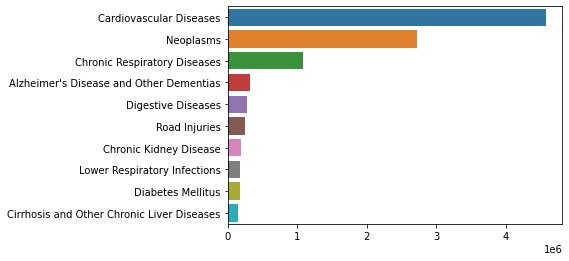

In [ ]:
china_2019 = df1[df1['Country/Territory']== "China"].groupby("Year").sum().loc[2019].sort_values(ascending=False)
sns.barplot(x=china_2019.values[:10],y=china_2019.index[:10],orient="h")

**Top 10 causes of Death in India**

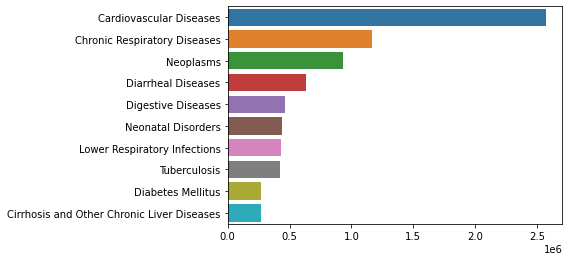

In [ ]:
india_2019 = df1[df1['Country/Territory']== "India"].groupby("Year").sum().loc[2019].sort_values(ascending=False)
sns.barplot(x=india_2019.values[:10],y=india_2019.index[:10],orient="h")

**We have seen for both India and China, Cardiovascular diseases is the major cause of deaths**

**Let's check the disease which suffers most of the countries as a major cause of death**

In [ ]:
cause_by_country = df1.groupby("Code").sum().drop(["Year"],axis=1).idxmax(axis=1)
cause_by_country.value_counts()

Cardiovascular Diseases         156
HIV/AIDS                         17
Neoplasms                        10
Diarrheal Diseases                7
Malaria                           5
Neonatal Disorders                4
Lower Respiratory Infections      4
Conflict and Terrorism            1
dtype: int64

**Out of 204 countries in the dataset, the major cause of death comes out to be cardiovascular diseases for 156 countries**

Text(0, 0.5, '# of Deaths')

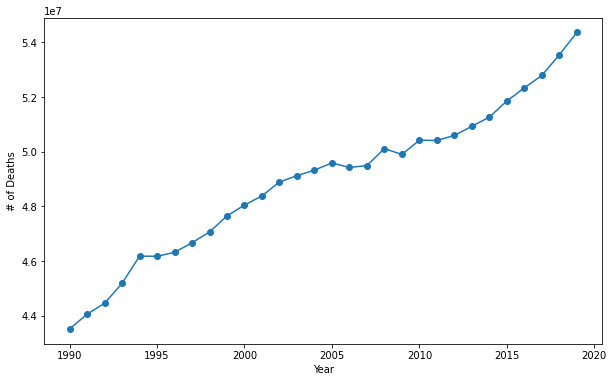

In [ ]:
death_by_year = df.groupby("Year").sum()["Total_no_of_deaths"]
fig = plt.figure(figsize=(10,6))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

**Deadliest year appears to be 2019 in terms of death counts, however it was due to the increase of the world population each year.**

**TOP 10 COUNTRIES SUFFERED FROM CARDIOVASCULAR DEATHS**

Text(0.5, 0, 'Total Deaths 1990-2019')

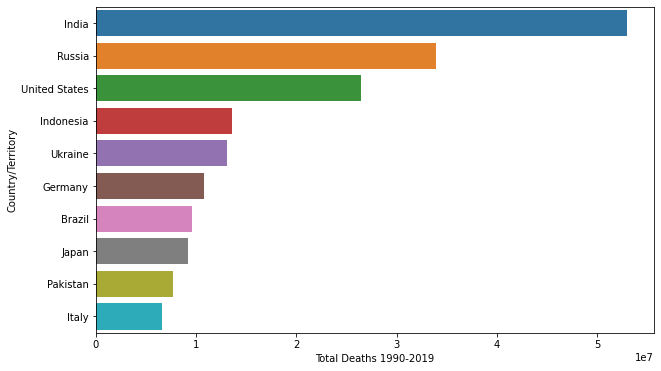

In [ ]:
country_cardio = df.groupby("Country/Territory").sum()["Cardiovascular Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_cardio[1:11].values,y=country_cardio[1:11].index,orient="h") 
plt.xlabel("Total Deaths 1990-2019")

**India has highest number of deaths due to cardiovascular diseases followed by Russia and US**

**TOP 10 COUNTRIES SUFFERED FROM HIV/AIDS**

Text(0.5, 0, 'Total Deaths 1990-2019')

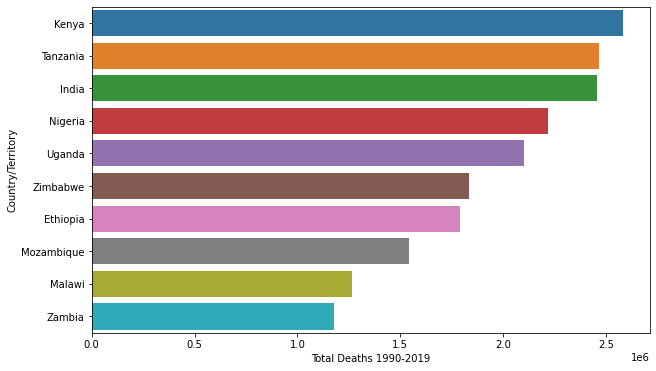

In [ ]:
country_AIDS = df.groupby("Country/Territory").sum()["HIV/AIDS"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_AIDS[1:11].values,y=country_AIDS[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**Across Sub-Saharan Africa the deaths are much higher. Most countries in the South of the region had deaths greater than 1.5 million. In India, the deaths due to HIV/AIDS were nearly 2.5 million.**

**TOP 10 COUNTRIES SUFFERED FROM NEOPLASMS**

Text(0.5, 0, 'Total Deaths 1990-2019')

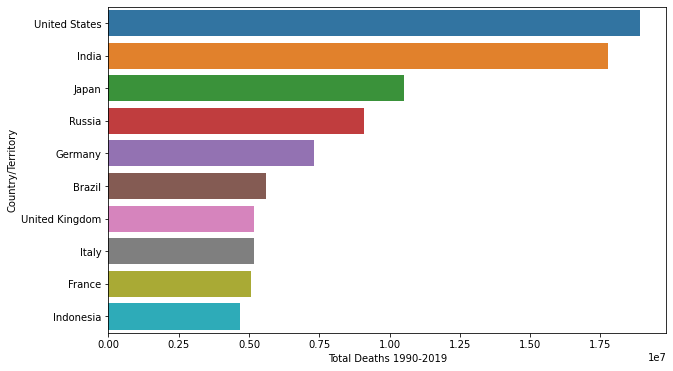

In [ ]:
country_neoplasms = df.groupby("Country/Territory").sum()["Neoplasms"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_neoplasms[1:11].values,y=country_neoplasms[1:11].index,orient="h") 
plt.xlabel("Total Deaths 1990-2019")

Cancer is a particularly common cause of death in richer countries where people are less likely to die of infectious diseases and causes of deaths that lead to very early deaths for people in poverty.

**TOP 10 COUNTRIES SUFFERED FROM DIARRHEAL DISEASES**

Text(0.5, 0, 'Total Deaths 1990-2019')

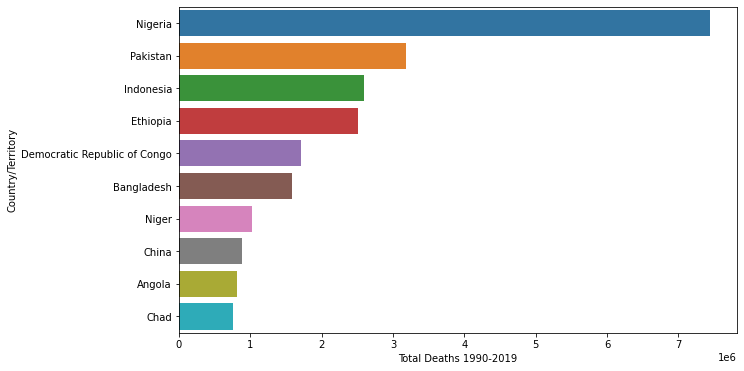

In [ ]:
country_diarrheal = df.groupby("Country/Territory").sum()["Diarrheal Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_diarrheal[1:11].values,y=country_diarrheal[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**Overall, we see the highest mortality in Sub-Saharan Africa and South Asia.**

**TOP 10 COUNTRIES WHO SUFFERED FROM MALARIA**

Text(0.5, 0, 'Total Deaths 1990-2019')

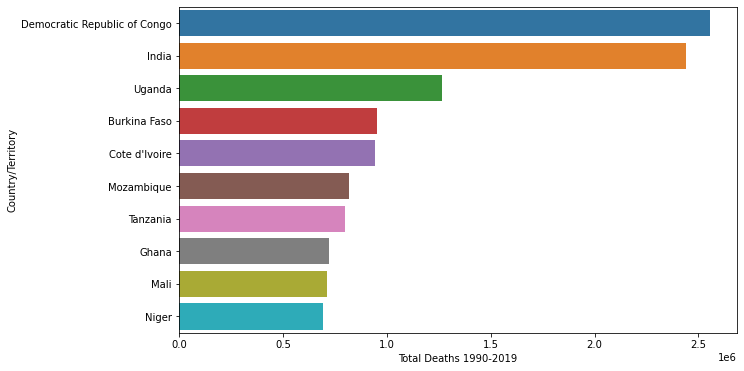

In [ ]:
country_malaria = df.groupby("Country/Territory").sum()["Malaria"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_malaria[1:11].values,y=country_malaria[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0, 0.5, '# of Deaths')

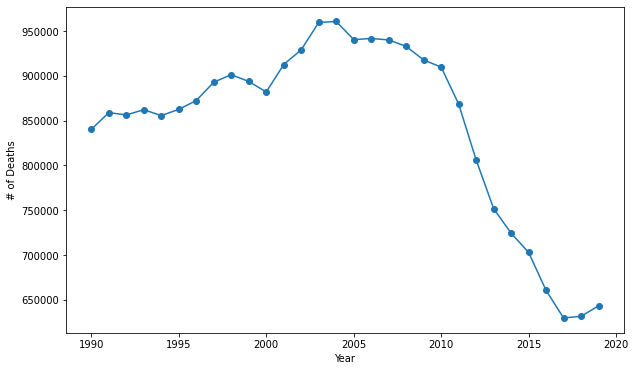

In [ ]:
death_by_year = df.groupby("Year").sum()["Malaria"]
fig = plt.figure(figsize=(10,6))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

* Majority of global deaths from malaria occurred on the African continent. But Africa is also the world region that has achieved most progress: since 2000, deaths have fallen significantly

**TOP 10 COUNTRIES AFFECTED BY NEONATAL DISORDERS**

Text(0.5, 0, 'Total Deaths 1990-2019')

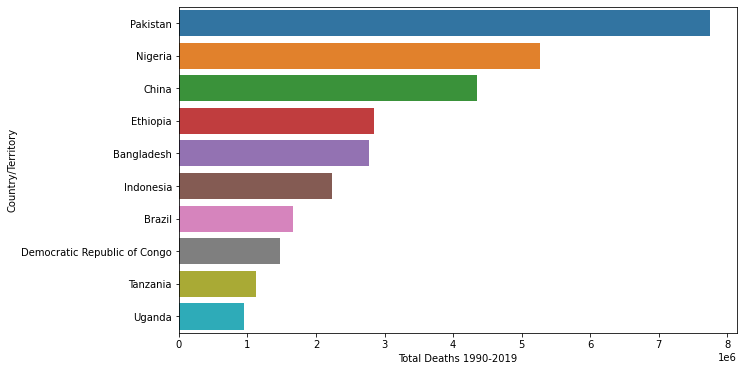

In [ ]:
country_neonatal = df.groupby("Country/Territory").sum()["Neonatal Disorders"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_neonatal[1:11].values,y=country_neonatal[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**The highest mortality are seen across Sub-Saharan Africa and Asia**

**TOP 10 COUNTRIES WHO SUFFERED WITH LOWER RESPIRATORY INFECTIONS THE MOST**

Text(0.5, 0, 'Total Deaths 1990-2019')

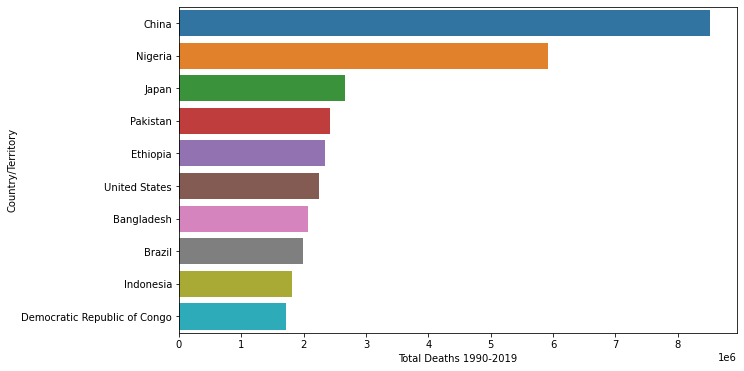

In [ ]:
country_LRI = df.groupby("Country/Territory").sum()["Lower Respiratory Infections"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_LRI[1:11].values,y=country_LRI[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

* China has highest number of deaths due to lower respiratory infections like Pneumonia

* USA also in top 6 in number of deaths due to lower respiratory infections

**TOP 10 COUNTRIES WHO SUFFERED WITH CONFLICTS AND TERRORISM THE MOST**

Text(0.5, 0, 'Total Deaths 1990-2019')

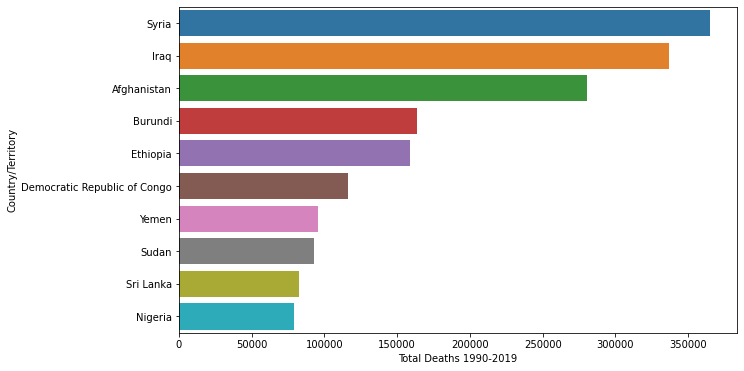

In [ ]:
country_terrorism = df.groupby("Country/Territory").sum()["Conflict and Terrorism"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_terrorism[1:11].values,y=country_terrorism[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**Syria tops the list in terms of conflicts and terrorism causing deaths in the country**

Text(0, 0.5, 'Death by Terrorism')

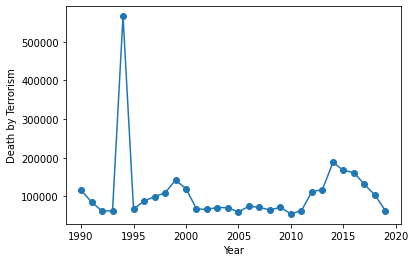

In [ ]:
df.groupby("Year").sum()["Conflict and Terrorism"].plot(marker="o")
plt.ylabel("Death by Terrorism")

* **1994 was the year where the deadliest conflicts took place in the world. Bosnian War in Europe may have contributed to it significantly.**

* After 2014, deaths due to conflicts and terrorism has been decreasing which is a good sign for the world

Text(0.5, 0, 'Total Deaths 1990-2019')

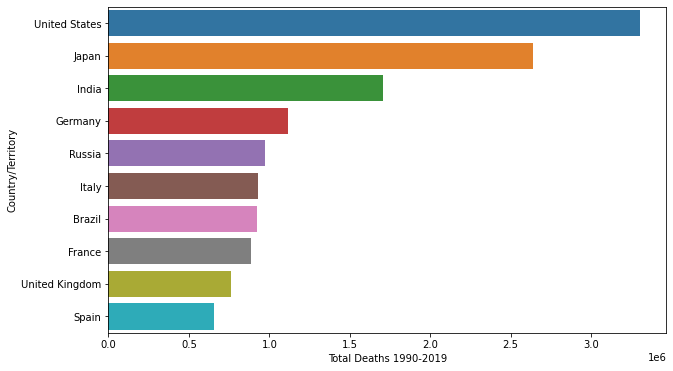

In [ ]:
country_dementia = df.groupby("Country/Territory").sum()["Alzheimer's Disease and Other Dementias"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_dementia[1:11].values,y=country_dementia[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**Dementia (mainly caused by Alzheimer's disease) appears to be the most leading cause of death in rich countries like USA, Japan, India, Germany, Russia , Italy, Brazil, France, UK and Spain. This could be due to the high frequency of elder people in their population.**

Text(0.5, 0, 'Total Deaths 1990-2019')

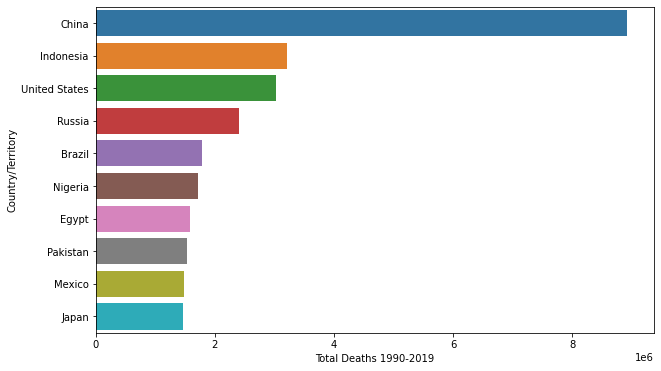

In [ ]:
country_digestive = df.groupby("Country/Territory").sum()["Digestive Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_digestive[1:11].values,y=country_digestive[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**TOP 10 COUNTRIES WHO SUFFERED WITH TUBERCULOSIS THE MOST**

Text(0.5, 0, 'Total Deaths 1990-2019')

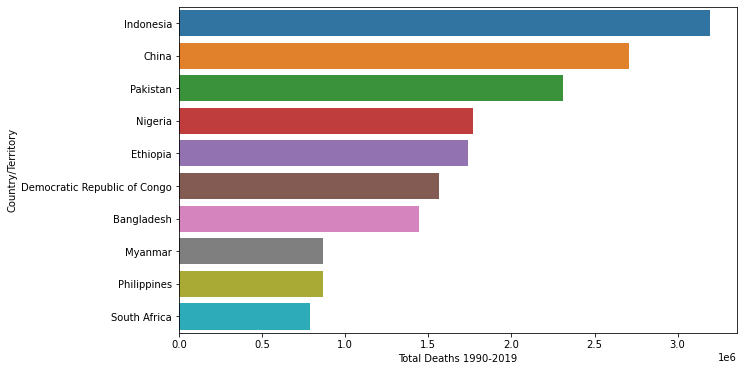

In [ ]:
country_TB = df.groupby("Country/Territory").sum()["Tuberculosis"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_TB[1:11].values,y=country_TB[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

Text(0.5, 0, 'Total Deaths 1990-2019')

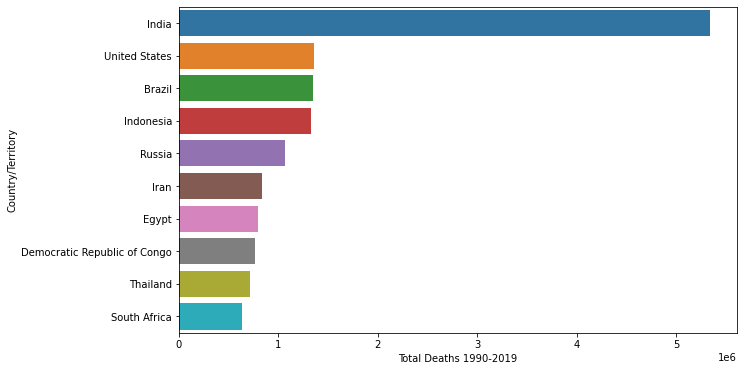

In [ ]:

country_road = df.groupby("Country/Territory").sum()["Road Injuries"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_road[1:11].values,y=country_road[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")


**India encounters highest number of road accidents which causes highest number of deaths due to road injuries**

In [ ]:
df1.describe().T.sort_values('max',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Cardiovascular Diseases,6120.0,73160.454575,291577.537794,4.0,2028.00,11742.0,42546.50,4584273.0
Neoplasms,6120.0,37542.244771,161558.365445,1.0,809.75,5629.5,20147.75,2716551.0
Chronic Respiratory Diseases,6120.0,17092.374837,105157.179839,1.0,289.00,1689.0,5249.75,1366039.0
Diarrheal Diseases,6120.0,10822.795425,65416.174485,0.0,20.00,296.5,3946.75,1119477.0
Neonatal Disorders,6120.0,12558.942647,56058.366412,0.0,131.00,916.0,7419.75,852761.0
Lower Respiratory Infections,6120.0,13687.914706,48031.720009,0.0,345.00,2126.5,10161.25,690913.0
Tuberculosis,6120.0,7491.928595,39549.977578,0.0,35.00,417.0,2924.25,657515.0
Conflict and Terrorism,6120.0,538.243954,7033.308187,0.0,0.00,0.0,23.00,503532.0
Digestive Diseases,6120.0,10725.267157,37228.051096,0.0,284.00,2185.0,6080.00,464914.0
Road Injuries,6120.0,5930.795588,24097.784291,0.0,174.75,966.5,3435.25,329237.0


* Cardiovascular diseases are the leading cause of death globally and it is clearly seen that the mean and maximum death is highest for it.

* Neoplasms has encounterd the second highest number of deaths in the World.



Text(0.5, 0, 'Total Deaths 1990-2019')

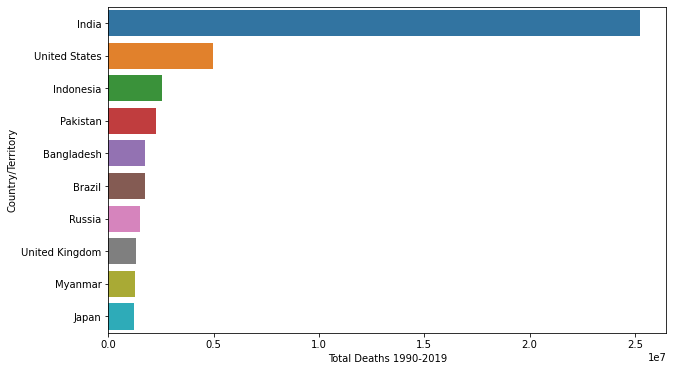

In [ ]:
country_chronic = df.groupby("Country/Territory").sum()["Chronic Respiratory Diseases"].sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=country_chronic[1:11].values,y=country_chronic[1:11].index,orient="h")
plt.xlabel("Total Deaths 1990-2019")

**India has encountered highest number of deaths as far as Chronic respiratory diseases is concerned and very high when compared to any other nation**